## Import Libarry 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## load data

In [2]:
data = pd.read_csv(r'C:\Users\it shop\OneDrive\Desktop\Heart_Disease_Prediction.csv')

In [3]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
data.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
data.describe()    

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [7]:
data.isnull().sum() 

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [8]:
data.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [9]:
data.shape

(270, 14)

In [10]:
data.duplicated().sum() 

0

In [11]:
for sex in data['Sex'].unique():
    median_chol = data.loc[data['Sex'] == sex, 'Cholesterol'].median()
    data.loc[
        (data['Sex'] == sex) & (data['Cholesterol'].isna()),
        'Cholesterol'
    ] = median_chol


In [12]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [13]:
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


## Analyzing the Association Between Age and Heart Disease


d:\.venv\.venv\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\.venv\.venv\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


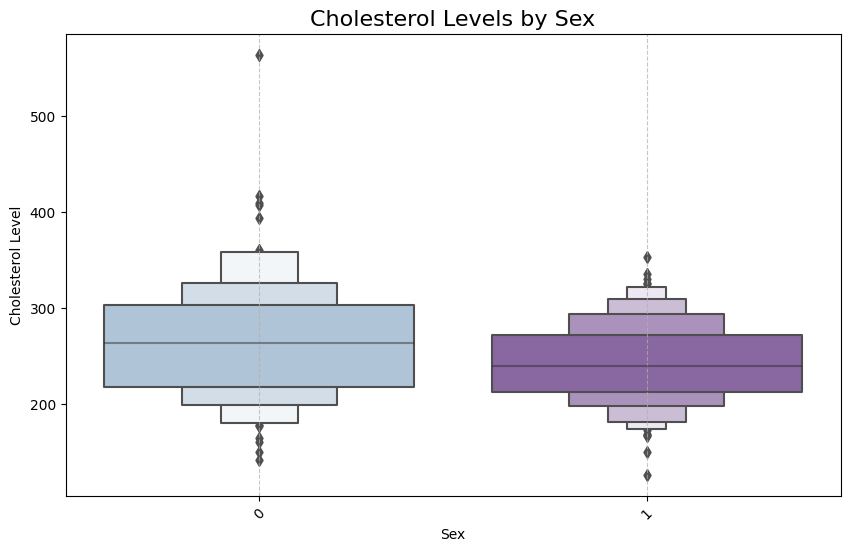

In [14]:
plt.figure(figsize=(10,6))
sns.boxenplot(
    x='Sex',
    y='Cholesterol',
    data=data, 
    palette='BuPu'
    )
plt.title('Cholesterol Levels by Sex', fontsize=16)
plt.xlabel('Sex')
plt.ylabel('Cholesterol Level')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##  Number of Patients by Heart Disease Status


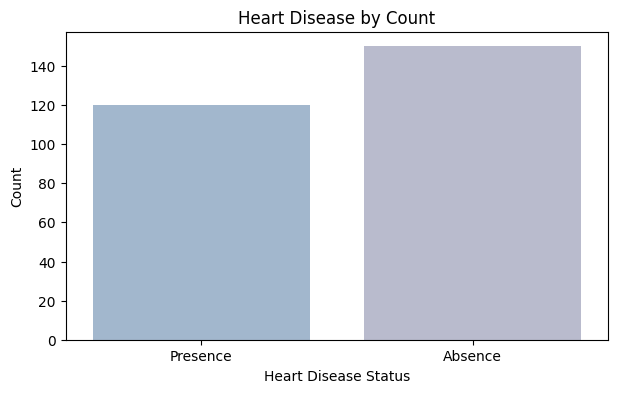

In [15]:
plt.figure(figsize=(7, 4))
sns.countplot(
    x='Heart Disease', 
    data=data, 
    palette=['#9BB7D4', '#B5B8D1']
)
plt.title('Heart Disease by Count', fontsize=12)
plt.xlabel('Heart Disease Status', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

 ## Sex vs Blood Pressure


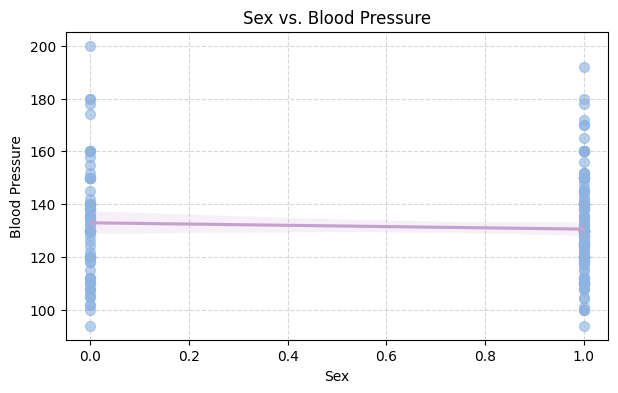

In [16]:
plt.figure(figsize=(7, 4))
sns.regplot(
    x='Sex', 
    y='BP', 
    data=data, 
    scatter_kws={'s':50, 'alpha':0.6, 'color':'#88B4E7'},
    line_kws={'color':'#C6A1CF'}
)
plt.title('Sex vs. Blood Pressure', fontsize=12)
plt.xlabel('Sex', fontsize=10)
plt.ylabel('Blood Pressure', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Cholesterol Levels by Chest Pain Type and Heart Disease Status


C:\Users\it shop\AppData\Local\Temp\ipykernel_20616\3535009477.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


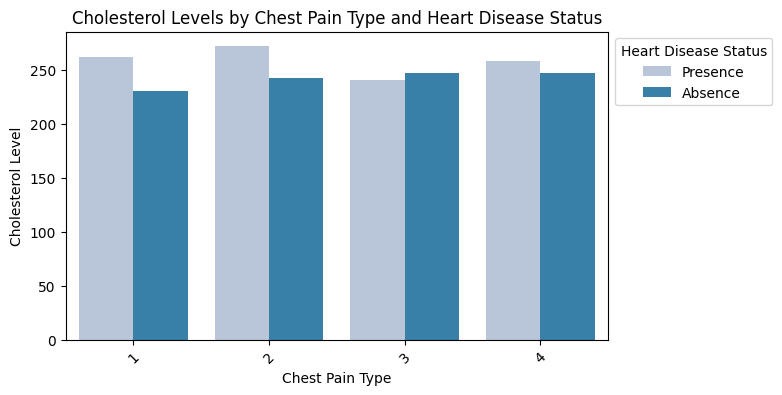

In [17]:
plt.figure(figsize=(7, 4))
sns.barplot(
  x='Chest pain type', 
  y='Cholesterol',
  hue='Heart Disease', 
    data=data, 
    palette='PuBu',
    ci=None
)
plt.title('Cholesterol Levels by Chest Pain Type and Heart Disease Status', fontsize=12)
plt.xlabel('Chest Pain Type', fontsize=10)
plt.ylabel('Cholesterol Level', fontsize=10)
plt.xticks(rotation=45)
plt.legend(title='Heart Disease Status', bbox_to_anchor=(1, 1))
plt.show()

## Correlation Between Clinical Features


<Axes: >

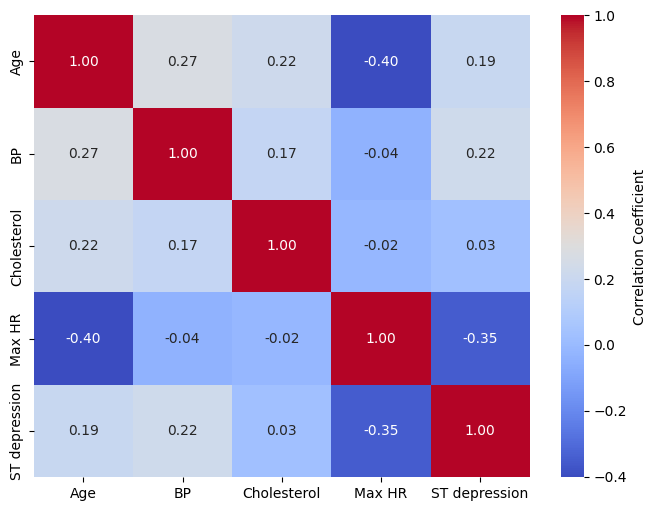

In [18]:
numeric_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
corr_matrix = data[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    cbar_kws={'label': 'Correlation Coefficient'}
)


In [19]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## Patient Count by Heart Disease Status


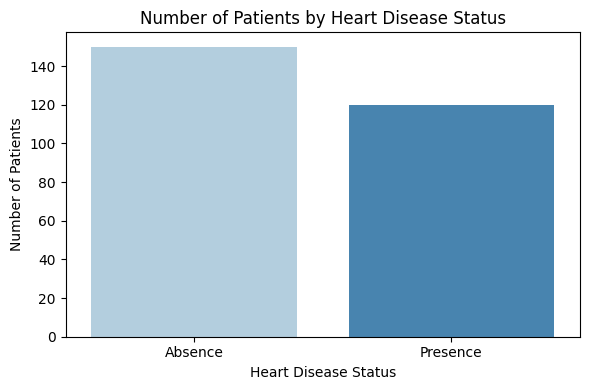

In [20]:
heart_counts = data['Heart Disease'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=heart_counts.index, y=heart_counts.values, palette='Blues')
plt.title("Number of Patients by Heart Disease Status", fontsize=12)
plt.xlabel("Heart Disease Status", fontsize=10)
plt.ylabel("Number of Patients", fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Distribution of Heart Disease Cases


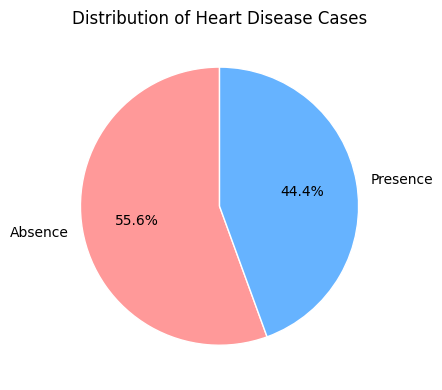

In [21]:
heart_counts = data['Heart Disease'].value_counts()
labels = heart_counts.index
sizes = heart_counts.values
colors = ["#FF9999", "#66B3FF"]

plt.figure(figsize=(6,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'white'})
plt.title("Distribution of Heart Disease Cases")
plt.tight_layout()
plt.show()


## Average Clinical Features by Heart Disease Status


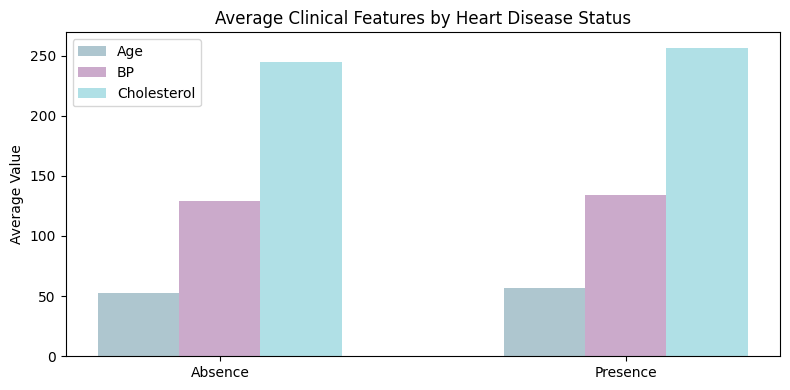

In [22]:
heart_avg = data.groupby("Heart Disease")[["Age", "BP", "Cholesterol"]].mean()

labels = heart_avg.index
x = np.arange(len(labels))
width = 0.2

plt.figure(figsize=(8,4))
plt.bar(x - width, heart_avg["Age"], width=width, label="Age", color="#AEC6CF")
plt.bar(x, heart_avg["BP"], width=width, label="BP", color="#CBAACB")
plt.bar(x + width, heart_avg["Cholesterol"], width=width, label="Cholesterol", color="#B0E0E6")

plt.xticks(x, labels)
plt.title("Average Clinical Features by Heart Disease Status")
plt.ylabel("Average Value")
plt.legend()
plt.tight_layout()
plt.show()
